In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the data
file_path = '/content/drive/My Drive/Thesis/LT1 Data.xlsx'
df = pd.read_excel(file_path)

# Ensure column names are correct
df.columns = ['Time', 'BG']

# Create lag features for BG
lags = 12
for i in range(1, lags + 1):
    df[f'BG_lag_{i}'] = df['BG'].shift(i)

# Drop initial rows with NaN values due to lagging
df.dropna(inplace=True)

# Split into features (X) and target (y)
X = df[[f'BG_lag_{i}' for i in range(1, lags + 1)]]
y = df['BG']

# Train ARX model (Linear Regression)
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Model evaluation
mse = mean_squared_error(y, y_pred)
print(f'Mean Squared Error: {mse}')

# Model coefficients
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Mean Squared Error: 0.2172185195733726
Model Coefficients: [ 2.45295394 -1.68727874 -0.26608491  0.59023904  0.11782534 -0.24851086
 -0.05383423  0.12385232  0.00653392 -0.0357409  -0.02883296  0.02789348]
Intercept: 0.1717811441054664


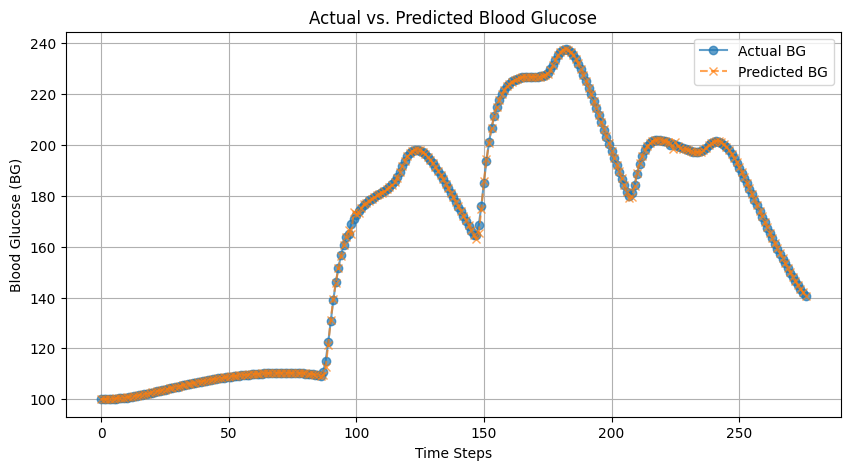

In [3]:
import matplotlib.pyplot as plt

# Plot actual vs predicted BG values
plt.figure(figsize=(10, 5))
plt.plot(y.values, label="Actual BG", linestyle='-', marker='o', alpha=0.7)
plt.plot(y_pred, label="Predicted BG", linestyle='--', marker='x', alpha=0.7)

plt.xlabel("Time Steps")
plt.ylabel("Blood Glucose (BG)")
plt.title("Actual vs. Predicted Blood Glucose")
plt.legend()
plt.grid(True)
plt.show()


In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the data
file_path = '/content/drive/My Drive/Thesis/LT1 Data.xlsx'
df = pd.read_excel(file_path)

# Ensure column names are correct
df.columns = ['Time', 'BG']

# Create lag features for BG
lags = 12
for i in range(1, lags + 1):
    df[f'BG_lag_{i}'] = df['BG'].shift(i)

# Shift target variable 12 steps backward to predict 12 steps ahead
df['BG_target'] = df['BG'].shift(-12)

# Drop rows with NaN values due to shifting
df.dropna(inplace=True)

# Split into features (X) and target (y)
X = df[[f'BG_lag_{i}' for i in range(1, lags + 1)]]
y = df['BG_target']

# Train ARX model (Linear Regression)
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Model evaluation
mse = mean_squared_error(y, y_pred)
print(f'Mean Squared Error: {mse}')

# Model coefficients
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Mean Squared Error: 274.4593252680424
Model Coefficients: [ 12.92870171 -18.80198439   2.99096824   6.5136452   -1.25945627
  -2.77399766   0.6878598    1.31356547  -0.80004476  -0.77138137
   1.14742972  -0.29668647]
Intercept: 21.663695641612946


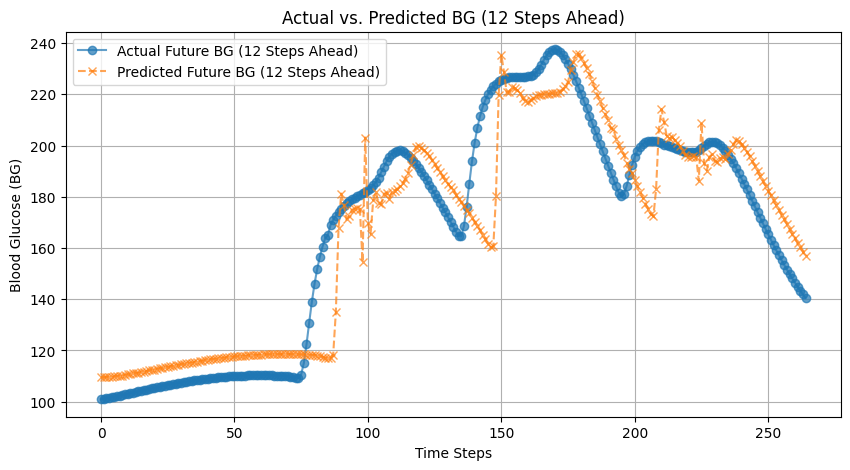

In [6]:


# Plot actual vs predicted 12 steps ahead
plt.figure(figsize=(10, 5))
plt.plot(y.values, label="Actual Future BG (12 Steps Ahead)", linestyle='-', marker='o', alpha=0.7)
plt.plot(y_pred, label="Predicted Future BG (12 Steps Ahead)", linestyle='--', marker='x', alpha=0.7)

plt.xlabel("Time Steps")
plt.ylabel("Blood Glucose (BG)")
plt.title("Actual vs. Predicted BG (12 Steps Ahead)")
plt.legend()
plt.grid(True)
plt.show()
